In [33]:
%pylab inline

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


C:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [34]:
#Reading the dataset
def read_dataset():
    df=pd.read_csv('train.csv')
    X=df[df.columns[1:5]].values
    y=df[df.columns[5]]
    
    #Encode the dependent variable
    encoder=LabelEncoder()
    encoder.fit(y)
    y=encoder.transform(y)
    Y=one_hot_encode(y)
    print(X.shape)
    return (X,Y)

In [35]:
#define the encoder function
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode

In [39]:
X,Y=read_dataset()
X,Y=shuffle(X,Y,random_state=1)


(1060, 4)


4

In [37]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
train_y

(848, 4)
(848, 2)
(212, 4)


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [12]:
learning_rate=0.01
epochs=1000
cost_history=np.empty(shape=[1],dtype=float)
n_dim=X.shape[1]
n_class=2


In [13]:
n_hidden_1=10
n_hidden_2=10
n_hidden_3=10
n_hidden_4=10

In [14]:
x=tf.placeholder(tf.float32,[None,n_dim])
w=tf.Variable(tf.zeros([n_dim,n_class]))
b=tf.Variable(tf.zeros([n_dim]))
y_=tf.placeholder(tf.float32,[None,n_class])

In [15]:
weights ={
          'h1':tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
          'h2':tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
          'h3':tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
          'h4':tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
         'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
        }
biases ={
          'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
          'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
          'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
          'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
         'out':tf.Variable(tf.truncated_normal([n_class]))
}

In [16]:
def neural_network(x,weights,biases):
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.sigmoid(layer_2)
    
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3=tf.nn.sigmoid(layer_3)
    
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4=tf.nn.relu(layer_4)
    
    out_layer=tf.matmul(layer_4,weights['out'])+biases['out']
    return out_layer
 
    

In [17]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

In [18]:
y=neural_network(x,weights,biases)

cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
sess=tf.Session()
sess.run(init)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



epoch:  0  -  cost : 1.1478521  -MSE  5.144580015782134  -Training accuracy : 0.4186321
epoch:  1  -  cost : 1.0992295  -MSE  5.207371229941786  -Training accuracy : 0.4186321
epoch:  2  -  cost : 1.055501  -MSE  5.277241972175087  -Training accuracy : 0.4186321
epoch:  3  -  cost : 1.0164015  -MSE  5.352438339687778  -Training accuracy : 0.4186321
epoch:  4  -  cost : 0.981586  -MSE  5.431370447994842  -Training accuracy : 0.4186321
epoch:  5  -  cost : 0.9507266  -MSE  5.512638441715183  -Training accuracy : 0.4186321
epoch:  6  -  cost : 0.9234993  -MSE  5.5949815078224  -Training accuracy : 0.4186321
epoch:  7  -  cost : 0.8997221  -MSE  5.677462458723961  -Training accuracy : 0.4186321
epoch:  8  -  cost : 0.87894064  -MSE  5.759208412197315  -Training accuracy : 0.40801886
epoch:  9  -  cost : 0.8608052  -MSE  5.839499900791872  -Training accuracy : 0.38915095
epoch:  10  -  cost : 0.84501296  -MSE  5.917757783153597  -Training accuracy : 0.3667453
epoch:  11  -  cost : 0.8312604

epoch:  93  -  cost : 0.6989478  -MSE  7.293158717560135  -Training accuracy : 0.5813679
epoch:  94  -  cost : 0.6985108  -MSE  7.294962774266143  -Training accuracy : 0.5813679
epoch:  95  -  cost : 0.6980762  -MSE  7.296754620115797  -Training accuracy : 0.5813679
epoch:  96  -  cost : 0.69764364  -MSE  7.298539672568783  -Training accuracy : 0.5813679
epoch:  97  -  cost : 0.69721293  -MSE  7.30031780824596  -Training accuracy : 0.5813679
epoch:  98  -  cost : 0.6967839  -MSE  7.30211577234286  -Training accuracy : 0.5813679
epoch:  99  -  cost : 0.696357  -MSE  7.303902070321639  -Training accuracy : 0.5813679
epoch:  100  -  cost : 0.6959322  -MSE  7.305683716724196  -Training accuracy : 0.5813679
epoch:  101  -  cost : 0.69550943  -MSE  7.307461406673834  -Training accuracy : 0.5813679
epoch:  102  -  cost : 0.6950882  -MSE  7.309244335618056  -Training accuracy : 0.5813679
epoch:  103  -  cost : 0.6946679  -MSE  7.311073352471014  -Training accuracy : 0.5813679
epoch:  104  -  c

epoch:  185  -  cost : 0.6654182  -MSE  7.4764419126262185  -Training accuracy : 0.6650943
epoch:  186  -  cost : 0.6651132  -MSE  7.478665026637657  -Training accuracy : 0.6662736
epoch:  187  -  cost : 0.6648092  -MSE  7.480889155630217  -Training accuracy : 0.6662736
epoch:  188  -  cost : 0.664506  -MSE  7.483130336470079  -Training accuracy : 0.6674528
epoch:  189  -  cost : 0.6642039  -MSE  7.485373667580777  -Training accuracy : 0.6674528
epoch:  190  -  cost : 0.66390294  -MSE  7.487617641980379  -Training accuracy : 0.6698113
epoch:  191  -  cost : 0.6636033  -MSE  7.489838237797647  -Training accuracy : 0.6698113
epoch:  192  -  cost : 0.6633047  -MSE  7.492068229513617  -Training accuracy : 0.6698113
epoch:  193  -  cost : 0.6630072  -MSE  7.494287337141536  -Training accuracy : 0.6698113
epoch:  194  -  cost : 0.6627108  -MSE  7.4965091391808905  -Training accuracy : 0.6698113
epoch:  195  -  cost : 0.66241527  -MSE  7.498731534570126  -Training accuracy : 0.6698113
epoch: 

epoch:  276  -  cost : 0.6409501  -MSE  7.68639348259882  -Training accuracy : 0.6992925
epoch:  277  -  cost : 0.6407045  -MSE  7.688945742318658  -Training accuracy : 0.6992925
epoch:  278  -  cost : 0.6404596  -MSE  7.691486143258786  -Training accuracy : 0.6992925
epoch:  279  -  cost : 0.64021516  -MSE  7.694037193352003  -Training accuracy : 0.6992925
epoch:  280  -  cost : 0.6399712  -MSE  7.696574867585189  -Training accuracy : 0.6992925
epoch:  281  -  cost : 0.63972795  -MSE  7.699096935282812  -Training accuracy : 0.6992925
epoch:  282  -  cost : 0.6394851  -MSE  7.701607900025246  -Training accuracy : 0.6992925
epoch:  283  -  cost : 0.6392425  -MSE  7.704125114718174  -Training accuracy : 0.7004717
epoch:  284  -  cost : 0.63900054  -MSE  7.706692906682653  -Training accuracy : 0.7004717
epoch:  285  -  cost : 0.63875896  -MSE  7.70924921897962  -Training accuracy : 0.7004717
epoch:  286  -  cost : 0.63851786  -MSE  7.711813233962563  -Training accuracy : 0.7004717
epoch: 

epoch:  367  -  cost : 0.6199897  -MSE  7.9200080734658815  -Training accuracy : 0.7122642
epoch:  368  -  cost : 0.61976904  -MSE  7.922612676545086  -Training accuracy : 0.7122642
epoch:  369  -  cost : 0.6195483  -MSE  7.9252021811373075  -Training accuracy : 0.7122642
epoch:  370  -  cost : 0.6193275  -MSE  7.927790063926503  -Training accuracy : 0.7122642
epoch:  371  -  cost : 0.61910653  -MSE  7.930395406056412  -Training accuracy : 0.7134434
epoch:  372  -  cost : 0.6188855  -MSE  7.933009671577768  -Training accuracy : 0.7146226
epoch:  373  -  cost : 0.61866474  -MSE  7.935628059332395  -Training accuracy : 0.7146226
epoch:  374  -  cost : 0.61844367  -MSE  7.9382402207316725  -Training accuracy : 0.7146226
epoch:  375  -  cost : 0.6182231  -MSE  7.940846297230695  -Training accuracy : 0.7146226
epoch:  376  -  cost : 0.61800253  -MSE  7.9434588735727045  -Training accuracy : 0.7146226
epoch:  377  -  cost : 0.61778176  -MSE  7.946077673478477  -Training accuracy : 0.7146226


epoch:  458  -  cost : 0.6001692  -MSE  8.162205355938658  -Training accuracy : 0.7216981
epoch:  459  -  cost : 0.59995353  -MSE  8.164863318476131  -Training accuracy : 0.7216981
epoch:  460  -  cost : 0.599738  -MSE  8.167512806826641  -Training accuracy : 0.7228774
epoch:  461  -  cost : 0.5995224  -MSE  8.170163286239504  -Training accuracy : 0.7228774
epoch:  462  -  cost : 0.59930676  -MSE  8.17280874572487  -Training accuracy : 0.7228774
epoch:  463  -  cost : 0.5990913  -MSE  8.175445900573013  -Training accuracy : 0.7228774
epoch:  464  -  cost : 0.5988757  -MSE  8.178075479722944  -Training accuracy : 0.7228774
epoch:  465  -  cost : 0.59865975  -MSE  8.180706302888936  -Training accuracy : 0.7228774
epoch:  466  -  cost : 0.5984437  -MSE  8.18333367368575  -Training accuracy : 0.7228774
epoch:  467  -  cost : 0.5982272  -MSE  8.18596161982832  -Training accuracy : 0.7228774
epoch:  468  -  cost : 0.5980104  -MSE  8.188598568263478  -Training accuracy : 0.7228774
epoch:  469

epoch:  549  -  cost : 0.58030754  -MSE  8.392293122237998  -Training accuracy : 0.7334906
epoch:  550  -  cost : 0.58008456  -MSE  8.394620294417757  -Training accuracy : 0.7334906
epoch:  551  -  cost : 0.5798614  -MSE  8.396938572387267  -Training accuracy : 0.7334906
epoch:  552  -  cost : 0.57963806  -MSE  8.39923888788804  -Training accuracy : 0.7334906
epoch:  553  -  cost : 0.5794146  -MSE  8.40153538771075  -Training accuracy : 0.7334906
epoch:  554  -  cost : 0.5791911  -MSE  8.403823004774516  -Training accuracy : 0.7334906
epoch:  555  -  cost : 0.5789674  -MSE  8.406088931030567  -Training accuracy : 0.7334906
epoch:  556  -  cost : 0.5787437  -MSE  8.408353957813212  -Training accuracy : 0.7334906
epoch:  557  -  cost : 0.5785197  -MSE  8.410609303695818  -Training accuracy : 0.7334906
epoch:  558  -  cost : 0.5782955  -MSE  8.412861650220524  -Training accuracy : 0.7334906
epoch:  559  -  cost : 0.5780711  -MSE  8.415115842318885  -Training accuracy : 0.7334906
epoch:  5

epoch:  640  -  cost : 0.55917525  -MSE  8.582734414515459  -Training accuracy : 0.7476415
epoch:  641  -  cost : 0.5589315  -MSE  8.584544286642666  -Training accuracy : 0.7476415
epoch:  642  -  cost : 0.55868745  -MSE  8.586344534956453  -Training accuracy : 0.7476415
epoch:  643  -  cost : 0.5584431  -MSE  8.588145046704138  -Training accuracy : 0.7476415
epoch:  644  -  cost : 0.5581983  -MSE  8.589941131072694  -Training accuracy : 0.7476415
epoch:  645  -  cost : 0.5579533  -MSE  8.591733985874951  -Training accuracy : 0.7488208
epoch:  646  -  cost : 0.557708  -MSE  8.593520870964674  -Training accuracy : 0.7488208
epoch:  647  -  cost : 0.5574621  -MSE  8.595299102194529  -Training accuracy : 0.7511792
epoch:  648  -  cost : 0.5572159  -MSE  8.597071041085247  -Training accuracy : 0.7523585
epoch:  649  -  cost : 0.5569693  -MSE  8.598844105540708  -Training accuracy : 0.7523585
epoch:  650  -  cost : 0.55672234  -MSE  8.600613895400032  -Training accuracy : 0.7523585
epoch:  

epoch:  731  -  cost : 0.5354909  -MSE  8.733681658536316  -Training accuracy : 0.7700472
epoch:  732  -  cost : 0.5352122  -MSE  8.735192937573181  -Training accuracy : 0.7700472
epoch:  733  -  cost : 0.53493327  -MSE  8.736684588378072  -Training accuracy : 0.7712264
epoch:  734  -  cost : 0.53465354  -MSE  8.738193470430227  -Training accuracy : 0.7712264
epoch:  735  -  cost : 0.5343736  -MSE  8.73969290949868  -Training accuracy : 0.7724057
epoch:  736  -  cost : 0.5340931  -MSE  8.74119209804408  -Training accuracy : 0.7724057
epoch:  737  -  cost : 0.53381205  -MSE  8.742690650223517  -Training accuracy : 0.7724057
epoch:  738  -  cost : 0.53353053  -MSE  8.744184944387074  -Training accuracy : 0.7724057
epoch:  739  -  cost : 0.5332484  -MSE  8.745677241820351  -Training accuracy : 0.7735849
epoch:  740  -  cost : 0.532966  -MSE  8.747174759116861  -Training accuracy : 0.7747642
epoch:  741  -  cost : 0.5326832  -MSE  8.748669787129737  -Training accuracy : 0.7747642
epoch:  7

epoch:  822  -  cost : 0.5082556  -MSE  8.861266668749995  -Training accuracy : 0.7983491
epoch:  823  -  cost : 0.50793344  -MSE  8.862542612675243  -Training accuracy : 0.7983491
epoch:  824  -  cost : 0.5076106  -MSE  8.863813574989265  -Training accuracy : 0.7983491
epoch:  825  -  cost : 0.5072873  -MSE  8.865084522545434  -Training accuracy : 0.7983491
epoch:  826  -  cost : 0.5069636  -MSE  8.866354535323644  -Training accuracy : 0.7983491
epoch:  827  -  cost : 0.5066398  -MSE  8.86764940398643  -Training accuracy : 0.7983491
epoch:  828  -  cost : 0.5063157  -MSE  8.868976962357994  -Training accuracy : 0.7995283
epoch:  829  -  cost : 0.50599104  -MSE  8.870302389861845  -Training accuracy : 0.7995283
epoch:  830  -  cost : 0.5056659  -MSE  8.871621237289238  -Training accuracy : 0.8007075
epoch:  831  -  cost : 0.5053402  -MSE  8.872934886251683  -Training accuracy : 0.8007075
epoch:  832  -  cost : 0.505014  -MSE  8.874239691746785  -Training accuracy : 0.8007075
epoch:  83

epoch:  913  -  cost : 0.47672307  -MSE  8.969639617985067  -Training accuracy : 0.8290094
epoch:  914  -  cost : 0.4763505  -MSE  8.970689378073518  -Training accuracy : 0.8290094
epoch:  915  -  cost : 0.47597733  -MSE  8.97173546549029  -Training accuracy : 0.8290094
epoch:  916  -  cost : 0.47560358  -MSE  8.972776678901445  -Training accuracy : 0.8290094
epoch:  917  -  cost : 0.4752292  -MSE  8.973815584327532  -Training accuracy : 0.8290094
epoch:  918  -  cost : 0.47485423  -MSE  8.974851244080288  -Training accuracy : 0.8301887
epoch:  919  -  cost : 0.47447866  -MSE  8.975884771174638  -Training accuracy : 0.8301887
epoch:  920  -  cost : 0.4741026  -MSE  8.976914082284415  -Training accuracy : 0.8301887
epoch:  921  -  cost : 0.47372574  -MSE  8.9779451836507  -Training accuracy : 0.8325472
epoch:  922  -  cost : 0.4733483  -MSE  8.978968792584439  -Training accuracy : 0.8337264
epoch:  923  -  cost : 0.47297022  -MSE  8.979989317471983  -Training accuracy : 0.8349057
epoch:

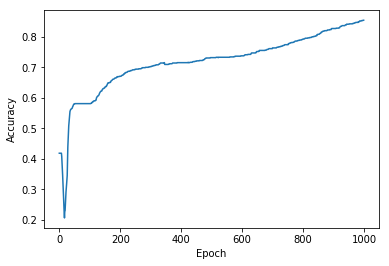

In [19]:
mse_history=[]
accuracy_history=[]
for epoch in range(epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost=sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
    cost_history=np.append(cost_history,cost)
    correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    pred_y=sess.run(y,feed_dict={x:test_x})
    mse=tf.reduce_mean(tf.square(pred_y - test_y))
    mse_=sess.run(mse)
    mse_history.append(mse_)
    accuracy=(sess.run(accuracy,feed_dict={x:train_x,y_:train_y}))
    accuracy_history.append(accuracy)
    print('epoch: ',epoch," - ","cost :", cost," -MSE ",mse_," -Training accuracy :",accuracy)
    
plt.plot(accuracy_history)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [20]:
#Print the final accuracy
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy: ",(sess.run(accuracy, feed_dict={x:test_x,y_:test_y})))

pred_y=sess.run(y, feed_dict={x:test_x})
mse=tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %.4f" %sess.run(mse))

Test Accuracy:  0.8443396
MSE: 9.0531
